In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm
import numpy.random as npr
from scipy import integrate

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [2]:
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

--2023-12-03 18:53:20--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2023-12-03 18:53:21--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc91300cebd698368c58ca247707.dl.dropboxusercontent.com/cd/0/inline/CIsi3dPa4Rk4eVMbZ_pDtI-epwZMri13WTah_62G2otr0hojzgGVwarbNRKopmUFrQCYjBSE1QfWU4HxjrZr4sv7XD0pfAJpDwtBs-21T07W_uxVY-3VTXS7gWmGFh8kmUg/file# [following]
--2023-12-03 18:53:21--  https://uc91300cebd698368c58ca247707.dl.dropboxusercontent.com/cd/0/inline/CIsi3dPa4Rk4eVMbZ_pDtI-epwZMri13WTah_62G2otr0hojzgGVwarbNRKopmUFrQCYjBSE1QfWU4HxjrZr4sv7XD0pfAJpDwtBs-21T07W_uxVY-3VTXS7gWmGFh8kmUg/file
Resolving uc

Text(0, 0.5, '$f_3$')

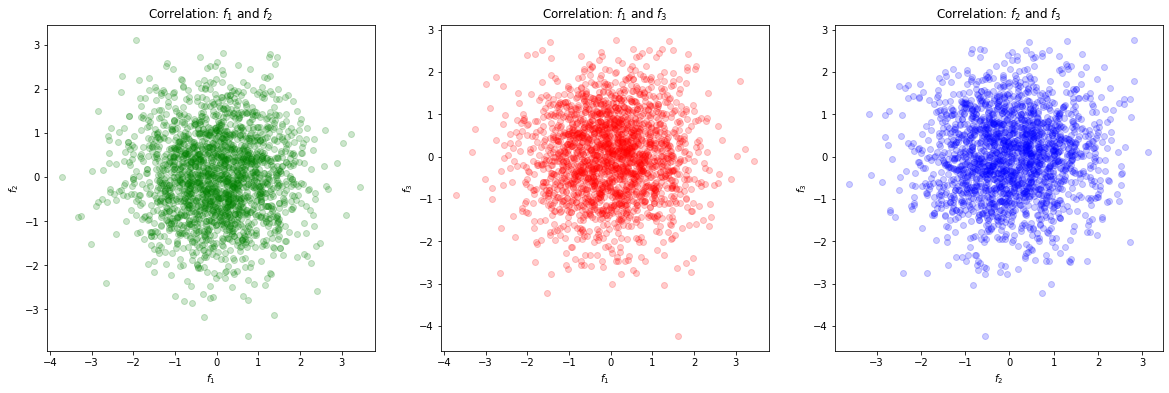

In [4]:
file_name = 'regression_generated.csv'
data = pd.read_csv(file_name)

f1 = data['features_1']
f2 = data['features_2']
f3 = data['features_3']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

scatter1 = ax1.scatter(x=f1, y=f2, c='green', alpha=0.2)
ax1.set_title('Correlation: $f_1$ and $f_2$')
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')

scatter2 = ax2.scatter(x=f1, y=f3, c='red', alpha=0.2)
ax2.set_title('Correlation: $f_1$ and $f_3$')
ax2.set_xlabel('$f_1$')
ax2.set_ylabel('$f_3$')


scatter3 = ax3.scatter(x=f2, y=f3, c='blue', alpha=0.2)
ax3.set_title('Correlation: $f_2$ and $f_3$')
ax3.set_xlabel('$f_2$')
ax3.set_ylabel('$f_3$')

Since there are no patterns to where the points are going, i.e.how they are trending, in all the plots, then we can say that there are not correlation between features. 

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

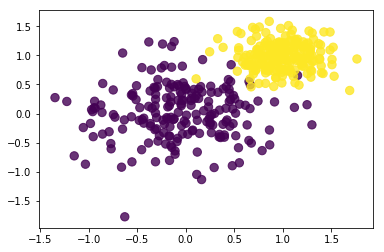

In [5]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

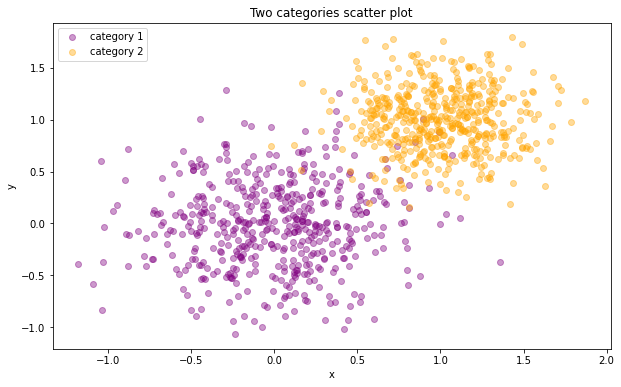

In [6]:
def gauss_2d(mu, sigma):
    x = random.gauss(mu, sigma)
    y = random.gauss(mu, sigma)
    return (x, y)

# function that accepts the number of samples,
# the mean (mu) and the variance (sigma) 
# it returns a 2D dataset with two categories
# distributed as gaussian
def dataset_2d(mu, sigma, n):
    xlist = []
    ylist = []
    for i in range(n):
        x, y = gauss_2d(mu, sigma)
        xlist.append(x)
        ylist.append(y)
    return (xlist, ylist)

# values in order to obtain a similar figure
# with respect to the given one
n = 500
mu1, sigma1 = 0, 0.4
mu2, sigma2 = 1, 0.3
x1, y1 = dataset_2d(mu1, sigma1, n)
x2, y2 = dataset_2d(mu2, sigma2, n)

# plot
fig, ax = plt.subplots(figsize=(10, 6))

scatter1 = ax.scatter(x=x1, y=y1, c='purple', alpha=0.4)
scatter2 = ax.scatter(x=x2, y=y2, c='orange', alpha=0.4)
ax.set_title('Two categories scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend([scatter1, scatter2], ['category 1', 'category 2'], loc='upper left')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-12-03 18:53:35--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-12-03 18:53:35--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc383b7522493535bd797681c7.dl.dropboxusercontent.com/cd/0/inline/CItfOm_TMir3BMHnxVh7vSYZYsk2_hXLpsiU-8s9YTRH-0lBJnMub1vypm-PJRVo2F-AyyIUCS5zgx25ICnSJp4ld6KPvIMSntv3leUKSNvvNozt8-UUGKoFjHfgeHMPUfY/file# [following]
--2023-12-03 18:53:35--  https://ucfc383b7522493535bd797681c7.dl.dropboxusercontent.com/cd/0/inline/CItfOm_TMir3BMHnxVh7vSYZYsk2_hXLpsiU-8s9YTRH-0lBJnMub1vypm-PJRVo2F-AyyIUCS5zgx25ICnSJp4ld6KPvIMSntv3leUKSNvvNozt8-UUGKoFjHfgeHMPUfY/file
Resolving ucfc383b7522493535bd797

In [8]:
# print the DataFrame
filename = 'data/residuals_261.pkl'
df = pd.DataFrame(np.load(filename,allow_pickle=True).item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


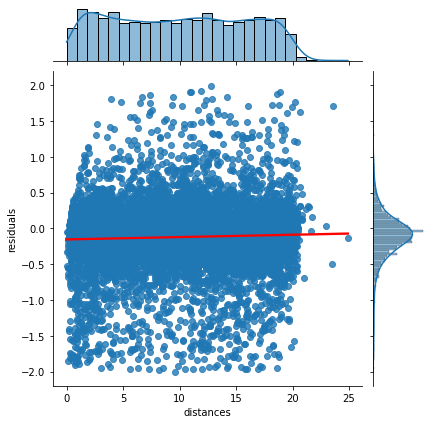

In [9]:
# clean dataset
mask = abs(df['residuals']) < 2
df = df[mask]
# regression plot
sns.jointplot(x='distances', y='residuals', data=df, kind="reg", line_kws={"color": "red"})

We can notice that the regrression line is almost parallel with the horizontal axis, for this reason we can say that basically there is no correlation between distances and residuals.

Text(0, 0.5, 'residuals')

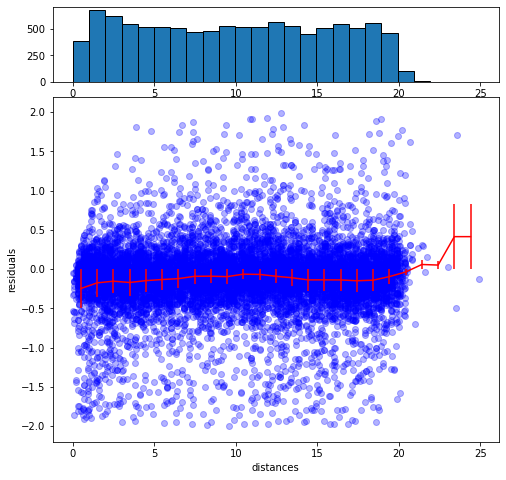

In [10]:
distances = df['distances']
residuals = df['residuals']
n=25 # bins

# histogram for the distance variable
fig1 = plt.figure(figsize=(10, 6)) 
_, bins, _ = plt.hist(distances, bins=n, density=True, cumulative=False, edgecolor='#000000')
ax = fig.axes[0]
ax.set_title('distances')
ax.set_xlabel('dist')
fig.tight_layout()
plt.close(fig1) # do not need to display it now

# the array of bin centers of the profile histogram for the distance variable
x = np.array((bins[1:] + bins[:-1])/2)

# the mean values of the residuals 
y = np.array([])
i = 0
for v in bins:
    if v != 0:
        if i == 0:
            mask = df['distances'] < v
            sample = df.loc[mask, 'residuals']
            mean = sample.mean()
            y = np.append(y, [mean])
            i += 1
        else:
            mask = (df['distances'] < v) & (df['distances'] > bins[i-1])
            sample = df.loc[mask, 'residuals']
            mean = sample.mean()
            y = np.append(y, [mean])
            i += 1

# the standard deviation of the residuals 
err_y = np.array([])
for i in range(bins.shape[0]):
    if i != 0:
        mask = (df['distances'] < bins[i]) & (df['distances'] > bins[i-1])
        sample = df.loc[mask, 'residuals']
        std = np.std(sample)
        err_y = np.append(y,[std])
err_y.resize(len(err_y)-1)

# profile plot on top of the scatter plot
gridsize = (5, 1)
fig = plt.figure(figsize=(8, 8))
#histogram
ax1 = plt.subplot2grid(gridsize, (0, 0))
_, _, _ = ax1.hist(distances, bins=n, edgecolor='#000000')
# scatter and error bar
ax2 = plt.subplot2grid(gridsize, (1, 0), rowspan=4)
scatter1 = ax2.scatter(x=df['distances'], y=df['residuals'], c='blue', alpha=0.3)
scatter2 = ax2.errorbar(x, y, yerr=err_y, c='red')
ax2.set_xlabel('distances')
ax2.set_ylabel('residuals')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


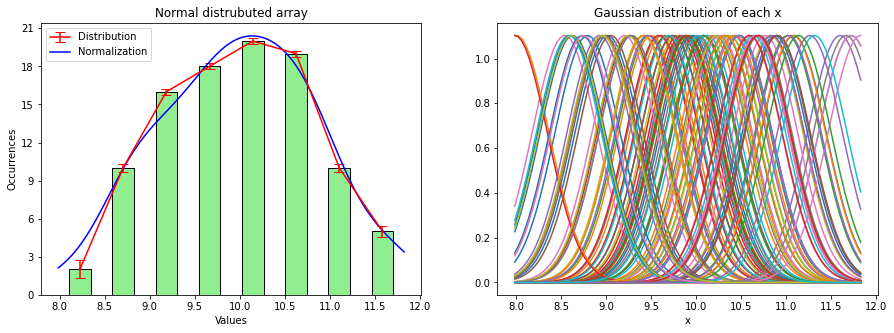

In [3]:
mean = 10 # mean
std = 0.8 # variance
n = 100 # length on gaussian array
x = npr.normal(mean, std, n) # gaussian array

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
h, bins, _ = ax1.hist(x, bins='auto', color='lightgreen', edgecolor='#000000', rwidth=0.5)
ax1.set_xlabel('Values')
ax1.set_ylabel('Occurrences')
ax1.set_title('Normal distrubuted array')
# customize the y-axis major ticks to display only integer values
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

# the array of bin centers
bin_center = np.array((bins[1:] + bins[:-1])/2)
# correction on h
zero_mask = h == 0.
h[zero_mask] = 1
# error on h
err_h = 1/np.sqrt(h)

# poisson uncertainty
scatter = ax1.errorbar(bin_center, h, yerr=err_h, c='red', markersize=7, capsize=5)

# gaussian distribution of each x
value_x = np.linspace(x.min(), x.max(), n)
gaussian = []
for i, mean in enumerate(x):
    mu = mean
    sigma = 1.06 * x.std() * x.size**(-1/5) 
    gaussian.append((norm(loc=mu, scale=sigma)).pdf(value_x))
    ax2.plot(value_x, gaussian[i])
    ax2.set_title('Gaussian distribution of each x')
    ax2.set_xlabel('x')
    
# sum
s = np.sum(gaussian, axis=0)
scale = s.mean() / h.mean()
norm_z = s / scale
normalization = ax1.plot(value_x, norm_z, color='blue')
ax1.legend([scatter, normalization[0]], ['Distribution', 'Normalization'], loc='upper left')